## Important Libraries


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.applications import *

## Extracting Zipfile in colab

In [ ]:
file = zipfile.ZipFile("/content/drive/MyDrive/Colab Notebooks/Tensorflow Projects/Image Classification Project/Butterfly Classification/Butterfly_images.zip", "r")
file.extractall()
file.close()

## Going through the directories

In [ ]:
import os

In [ ]:
for dirpath, dirnames, filenames in os.walk("/content/train"):
  print(f"There are {len(filenames)} files and {len(dirnames)} in {dirpath}")

There are 0 files and 75 in /content/train
There are 104 files and 0 in /content/train/GOLD BANDED
There are 132 files and 0 in /content/train/PURPLISH COPPER
There are 127 files and 0 in /content/train/RED POSTMAN
There are 134 files and 0 in /content/train/COPPER TAIL
There are 120 files and 0 in /content/train/PEACOCK
There are 123 files and 0 in /content/train/BLUE SPOTTED CROW
There are 125 files and 0 in /content/train/ORANGE OAKLEAF
There are 123 files and 0 in /content/train/MESTRA
There are 107 files and 0 in /content/train/AFRICAN GIANT SWALLOWTAIL
There are 126 files and 0 in /content/train/GREEN CELLED CATTLEHEART
There are 108 files and 0 in /content/train/ZEBRA LONG WING
There are 128 files and 0 in /content/train/SOOTYWING
There are 117 files and 0 in /content/train/ELBOWED PIERROT
There are 128 files and 0 in /content/train/CABBAGE WHITE
There are 103 files and 0 in /content/train/CRIMSON PATCH
There are 123 files and 0 in /content/train/RED SPOTTED PURPLE
There are 124

### Getting Class Names

In [ ]:
import pathlib

In [ ]:
path = pathlib.Path("train")
class_names = []
for i in path.glob("*"):
  class_names.append(i.name)

In [ ]:
class_names[:10]

['GOLD BANDED',
 'PURPLISH COPPER',
 'RED POSTMAN',
 'COPPER TAIL',
 'PEACOCK',
 'BLUE SPOTTED CROW',
 'ORANGE OAKLEAF',
 'MESTRA',
 'AFRICAN GIANT SWALLOWTAIL',
 'GREEN CELLED CATTLEHEART']

## Going through the dataset(displaying random image)

In [ ]:
import matplotlib.image as mpimg
import random

In [ ]:
def random_image(base_folder, target_folder):

  target_file = base_folder + target_folder
  random_img = random.sample(os.listdir(target_file), 1)

  img = mpimg.imread(target_file + "/" + random_img[0])
  plt.imshow(img)

  plt.title(target_folder)

  plt.axis(False)

  print(f"Image Shape : {img.shape}") 

Image Shape : (224, 224, 3)
Image Shape : (224, 224, 3)
Image Shape : (224, 224, 3)
Image Shape : (224, 224, 3)
Image Shape : (224, 224, 3)
Image Shape : (224, 224, 3)
Image Shape : (224, 224, 3)
Image Shape : (224, 224, 3)
Image Shape : (224, 224, 3)


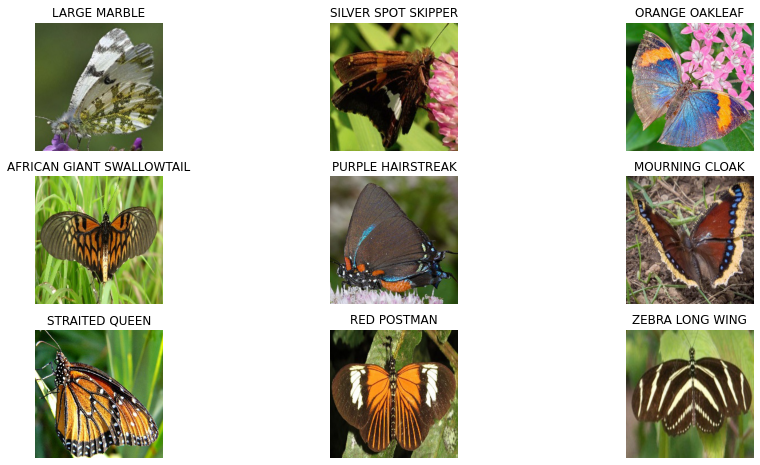

In [ ]:
plt.figure(figsize = (15, 8))
for i in range(1, 10):
  plt.subplot(3, 3, i)
  random_image(base_folder = "/content/train/", target_folder = random.choice(class_names))

# Preprocessing the dataset 

### Image Generator

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_path = "/content/train/"
valid_path = "/content/valid/"

In [ ]:
tf.random.set_seed(10)
train_datagen = ImageDataGenerator(rescale = 1./255.)
valid_datagen = ImageDataGenerator(rescale = 1./255.)

In [ ]:
train_data = train_datagen.flow_from_directory(directory = train_path, 
                                               batch_size = 32,
                                               target_size = (224, 224), 
                                               class_mode = "categorical", 
                                               shuffle = True, 
                                               seed = 42
                                               )

validation_data = valid_datagen.flow_from_directory(directory = valid_path, 
                                               batch_size = 32,
                                               target_size = (224, 224), 
                                               class_mode = "categorical", 
                                               shuffle = True, 
                                               seed = 42
                                               )


Found 9285 images belonging to 75 classes.
Found 375 images belonging to 75 classes.


# Model Creation

### Model_1: Simple Model

In [ ]:
model_1 = tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(input_shape = (224, 224, 3), filters = 10, kernel_size = 3, activation = "relu"), 
    
    tf.keras.layers.Conv2D(filters = 10, kernel_size = 3, activation = "relu"),
    tf.keras.layers.MaxPool2D(pool_size = 2, padding = "valid"),
    tf.keras.layers.Conv2D(filters = 10, kernel_size = 3, activation = "relu"),
    tf.keras.layers.Conv2D(filters = 10, kernel_size = 3, activation = "relu"),
    tf.keras.layers.Conv2D(filters = 10, kernel_size = 3, activation = "relu"),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(len(class_names), activation = "softmax")
                                        
                                    ])



In [ ]:
model_1.compile(loss = ["categorical_crossentropy"], 
                optimizer = tf.keras.optimizers.Adam(), 
                metrics = ["accuracy"])

In [ ]:
# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=validation_data,
                        validation_steps=len(validation_data))

Epoch 1/5
291/291 [==============================] - 35s 78ms/step - loss: 3.3501 - accuracy: 0.1997 - val_loss: 2.5629 - val_accuracy: 0.4027
Epoch 2/5
291/291 [==============================] - 22s 77ms/step - loss: 1.1424 - accuracy: 0.7072 - val_loss: 2.8606 - val_accuracy: 0.4027
Epoch 3/5
291/291 [==============================] - 22s 76ms/step - loss: 0.0606 - accuracy: 0.9863 - val_loss: 5.2669 - val_accuracy: 0.3840
Epoch 4/5
291/291 [==============================] - 22s 76ms/step - loss: 0.0832 - accuracy: 0.9836 - val_loss: 5.0712 - val_accuracy: 0.3093
Epoch 5/5
291/291 [==============================] - 22s 77ms/step - loss: 0.0268 - accuracy: 0.9947 - val_loss: 5.1293 - val_accuracy: 0.3733


### Model_2: Larger Model

In [ ]:
def createModel():
    model = Sequential()
    model.add(Conv2D(32, (3,3), padding= 'same', activation='relu',
                    input_shape = (224,224,3)))
    model.add(Conv2D(32, (3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(75, activation="softmax"))
    
    return model

model_2 = createModel()
batch_size = 256
epochs = 10
model_2.compile(optimizer='adam', loss='categorical_crossentropy',
             metrics = ['accuracy'])
    

In [ ]:
history = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=validation_data,
                        validation_steps=len(validation_data))

Epoch 1/5
291/291 [==============================] - 41s 131ms/step - loss: 4.3274 - accuracy: 0.0158 - val_loss: 4.3178 - val_accuracy: 0.0133
Epoch 2/5
291/291 [==============================] - 38s 129ms/step - loss: 4.3155 - accuracy: 0.0201 - val_loss: 4.3187 - val_accuracy: 0.0133
Epoch 3/5
291/291 [==============================] - 36s 125ms/step - loss: 4.3146 - accuracy: 0.0201 - val_loss: 4.3197 - val_accuracy: 0.0133
Epoch 4/5
291/291 [==============================] - 37s 125ms/step - loss: 4.3141 - accuracy: 0.0201 - val_loss: 4.3204 - val_accuracy: 0.0133
Epoch 5/5
291/291 [==============================] - 36s 125ms/step - loss: 4.3136 - accuracy: 0.0201 - val_loss: 4.3209 - val_accuracy: 0.0133


### Model_4: Includes VGG, EfficientNet, Resnets etc

#### Prefetching the data

In [ ]:
# It will work when you use image_dataset_from_directory

# train_data = train_data.prefetch(tf.data.AUTOTUNE)
# validation_data = validation_data.prefetch(tf.data.AUTOTUNE)

#### Model_4

In [ ]:
tf.random.set_seed(10)

In [ ]:
input_shape = (224, 224) + (3,)

base_model = VGG16(input_shape = input_shape, 
                            include_top = False, 
                            weights = "imagenet")

base_model.trainable = False

inputs = Input(shape = input_shape, name = "input_layer")

x = base_model(inputs, training = False)

x = GlobalAveragePooling2D(name = "pooling_layer")(x)

x = Dropout(0.2)(x)

x = Dense(400, activation = "relu")(x)

outputs = Dense(len(class_names), activation = "softmax", name = "output_layer")(x)

model_4 = Model(inputs, outputs)

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
model_4.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 pooling_layer (GlobalAverag  (None, 512)              0         
 ePooling2D)                                                     
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 400)               205200    
                                                                 
 output_layer (Dense)        (None, 75)                30075     
                                                             

In [ ]:
model_4.compile(loss= "categorical_crossentropy", 
                optimizer = "adam", 
                metrics = ["accuracy"])

In [ ]:
history_4 = model_4.fit(train_data, 
                        epochs = 5,
                        validation_data = validation_data)

Epoch 1/5
291/291 [==============================] - 56s 181ms/step - loss: 3.4081 - accuracy: 0.2313 - val_loss: 2.1503 - val_accuracy: 0.5173
Epoch 2/5
291/291 [==============================] - 50s 170ms/step - loss: 1.8330 - accuracy: 0.5555 - val_loss: 1.2745 - val_accuracy: 0.6987
Epoch 3/5
291/291 [==============================] - 50s 172ms/step - loss: 1.3492 - accuracy: 0.6517 - val_loss: 0.9535 - val_accuracy: 0.7813
Epoch 4/5
291/291 [==============================] - 49s 169ms/step - loss: 1.1301 - accuracy: 0.7059 - val_loss: 0.7945 - val_accuracy: 0.8000
Epoch 5/5
291/291 [==============================] - 49s 170ms/step - loss: 0.9954 - accuracy: 0.7316 - val_loss: 0.7048 - val_accuracy: 0.8480


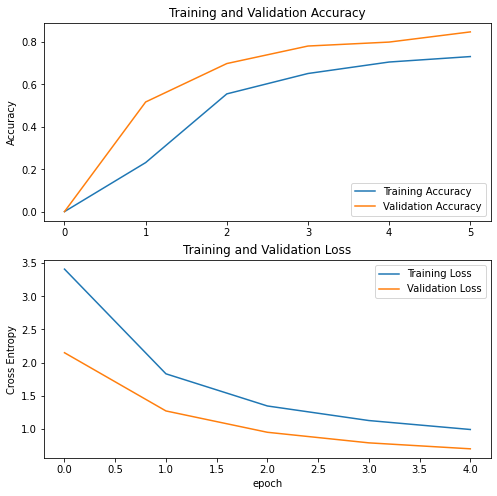

In [ ]:
acc = [0.] + history_4.history['accuracy']
val_acc = [0.] + history_4.history['val_accuracy']

loss = history_4.history['loss']
val_loss = history_4.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

## Fine Tuning

In [ ]:
# for layer in model_4.layers:
  # print(layer.trainable)

In [ ]:
base_model.trainable = True

# # Freeze all layers except for the
# for layer in base_model.layers[:-10]:
#   layer.trainable = False



In [ ]:
model_4.compile(loss= "categorical_crossentropy", 
                optimizer = "adam", 
                metrics = ["accuracy"])

In [ ]:
# history_fine = model_4.fit(train_data, 
#                         epochs = fine_tune_epochs,
#                         steps_per_epoch = len(train_data),
#                         initial_epoch = history_4.epoch[-1], 
#                         validation_data = validation_data, 
#                         validation_steps = len(validation_data))

history_4 = model_4.fit(train_data,
                         epochs=10,
                         validation_data=validation_data)

Epoch 1/10
291/291 [==============================] - 130s 430ms/step - loss: 27.9487 - accuracy: 0.0171 - val_loss: 4.3189 - val_accuracy: 0.0133
Epoch 2/10
291/291 [==============================] - 123s 423ms/step - loss: 4.3155 - accuracy: 0.0201 - val_loss: 4.3199 - val_accuracy: 0.0133
Epoch 3/10
291/291 [==============================] - 123s 423ms/step - loss: 4.3146 - accuracy: 0.0201 - val_loss: 4.3205 - val_accuracy: 0.0133
Epoch 4/10
104/291 [=========>....................] - ETA: 1:18 - loss: 4.3121 - accuracy: 0.0180

In [ ]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
# plt.plot([initial_epochs-1,initial_epochs-1],
#          plt.ylim(), label='Start Fine Tuning')
plt.axvline(x = initial_epochs-1,ymin = 0.01, color = "g", label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

